In [112]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

from packages.utils import standard_OHE


In [113]:
# Importazione dataset

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [114]:
for i in list(data.columns):
    print(i)

Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [115]:
#Modifica nome delle colonne
data.rename(columns={"Bankrupt?" : "Bancarotta"," ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione"," ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse"," ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte"," Operating Gross Margin" : "Margine Lordo Operativo"," Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive"," Operating Profit Rate" : "Margine di Profitto Operativo"," Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte"," After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse"," Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria"," Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)"," Operating Expense Rate" : "Tasso di Spesa Operativa", " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo", " Cash flow rate" : "Tasso di flusso di cassa", " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", " Tax rate (A)" : "Aliquota fiscale (A)", " Net Value Per Share (B)" : "Valore Netto per Azione (B)", " Net Value Per Share (A)" : "Valore Netto per Azione (A)", " Net Value Per Share (C)" : "Valore Netto per Azione (C)", " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", " Cash Flow Per Share" : "Flusso di cassa per azione", " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)"," Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", " Net Value Growth Rate" : "Tasso crescita valore netto"," Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset "," Cash Reinvestment %" : "Percentuale di reinvestimento del contante", " Current Ratio" : "Rapporto Corrente", " Quick Ratio" : "Rapporto Rapido", " Interest Expense Ratio" : "Rapporto Spese Interesse", " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", " Debt ratio %" : "Rapporto debito %", " Net worth/Assets" : "Patrimonio netto/Attività", " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", " Borrowing dependency" : "Indebitamento da prestiti", " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", " Total Asset Turnover" : "Rotazione totale degli asset", " Accounts Receivable Turnover" : "Rotazione dei crediti", " Average Collection Days" : "Giorni medi di incasso", " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", " Revenue per person" : "Entrate per persona", " Operating profit per person" : "Profitto operativo per persona", " Allocation rate per person" : "Tariffa di allocazione per persona", " Working Capital to Total Assets" : "Capitale circolante su attivo totale", " Quick Assets/Total Assets" : "Attività rapide/Attività totali", " Current Assets/Total Assets" : "Attività correnti/Attività totali", " Cash/Total Assets" : "Cassa/Attività Totali", " Quick Assets/Current Liability" : "Attività rapide su passività corrente", " Cash/Current Liability" : "Cassa/Passività correnti", " Current Liability to Assets" : "Passività correnti su attività", " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", " Inventory/Working Capital" : "Inventario/Capitale circolante", " Inventory/Current Liability" : "Inventario/Passività corrente", " Current Liabilities/Liability" : "Correnti Passività/Passivo", " Working Capital/Equity" : "Capitale circolante/patrimonio netto", " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", " Total income/Total expense" : "Reddito totale/Spese totali", " Total expense/Assets" : "Spese totali/Attività", " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", " Cash Turnover Rate" : "Velocità di Rotazione del Contante", " Cash Flow to Sales" : "Flusso di cassa su vendite", " Fixed Assets to Assets" : "Attivi fissi su attivi", " Current Liability to Liability" : "Rapporto attuale di passività", " Current Liability to Equity" : "Passività corrente su patrimonio netto", " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", " Cash Flow to Total Assets" : "Cash Flow su Attività Totali"," Cash Flow to Liability" : "Flusso di cassa sulle passività", " CFO to Assets" : "Rapporto CFO su Attività", " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", " Liability-Assets Flag" : "Indicatore Passività-Attività", " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", " No-credit Interval" : "Intervallo senza credito", " Gross Profit to Sales" : "Utile lordo sulle vendite"," Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", " Liability to Equity" : "Responsabilità verso il patrimonio netto", " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", " Net Income Flag" : "Indicatore di Reddito Netto", " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)


In [116]:
# Dimensione dataset

df = pd.DataFrame(data)

print("La dimensione del dataset è: ", df.shape)

La dimensione del dataset è:  (6819, 96)


In [117]:
# Valori Mancanti

# print(df.head())

# missing_values = df.isnull()
missing_values_count = df.isnull().sum()
print(missing_values_count)

Bancarotta                                                     0
ROA(C) prima degli interessi e della svalutazione              0
ROA(A) prima degli interessi e dopo le tasse                   0
ROA(B) al lordo di interessi e ammortamenti dopo le imposte    0
Margine Lordo Operativo                                        0
                                                              ..
Responsabilità verso il patrimonio netto                       0
Grado di leva finanziaria (DFL)                                0
Rapp. di copertura degli interessi (interessi passivi/EBIT)    0
Indicatore di Reddito Netto                                    0
Capitale proprio/Passività                                     0
Length: 96, dtype: int64


In [118]:
# Valori Duplicati

Duplicates = df.duplicated().sum()
print("Numero di duplicati: ", Duplicates)

Numero di duplicati:  0


In [119]:
# Tipologia dati

print(df.dtypes)

Bancarotta                                                       int64
ROA(C) prima degli interessi e della svalutazione              float64
ROA(A) prima degli interessi e dopo le tasse                   float64
ROA(B) al lordo di interessi e ammortamenti dopo le imposte    float64
Margine Lordo Operativo                                        float64
                                                                ...   
Responsabilità verso il patrimonio netto                       float64
Grado di leva finanziaria (DFL)                                float64
Rapp. di copertura degli interessi (interessi passivi/EBIT)    float64
Indicatore di Reddito Netto                                      int64
Capitale proprio/Passività                                     float64
Length: 96, dtype: object


In [120]:
# variabili dummy
dummy_cols = data.columns[data.nunique() == 2]
data_dummy = data[dummy_cols]

print(data_dummy)

      Bancarotta  Indicatore Passività-Attività
0              1                              0
1              1                              0
2              1                              0
3              1                              0
4              1                              0
...          ...                            ...
6814           0                              0
6815           0                              0
6816           0                              0
6817           0                              0
6818           0                              0

[6819 rows x 2 columns]


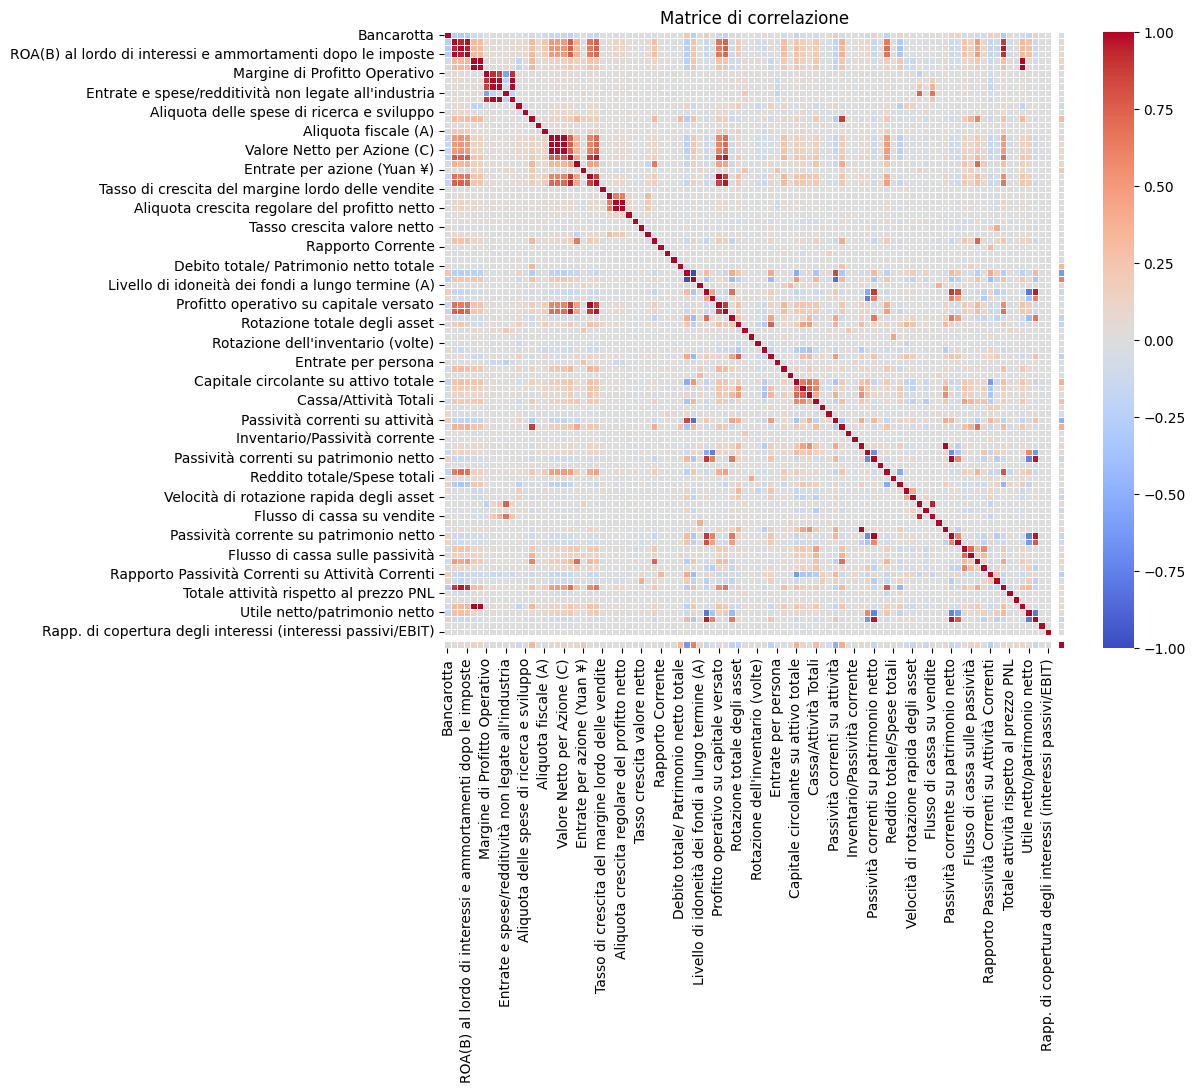

In [121]:
# Matrice di Correlazione
correlation_matrix = data.corr()
correlation_matrix

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()


In [122]:
df[df['Bancarotta'] == 1].shape

(220, 96)

In [123]:
df_zeros = df[df['Bancarotta'] == 0]
df_ones = df[df['Bancarotta'] == 1]
n_desired_ones = 600
df_zeros = df_zeros.sample(n_desired_ones, random_state=42)
df_unbalanced = pd.concat([df_zeros, df_ones])

In [124]:
df_unbalanced = standard_OHE(df_unbalanced)
df_unbalanced.shape

(1526, 96)

In [125]:
# Balanced Dataset

#df_zeros = df[df['Bancarotta'] == 0]
#n_obs_to_remove = df.shape[0]-(2*len(df[df['Bancarotta'] == 1]))
#df_zeros_to_remove = df_zeros.sample(n=n_obs_to_remove, random_state=50)
#df_cleaned = df.drop(df_zeros_to_remove.index)

#print(df_cleaned)

In [126]:

#df_cleaned = standard_OHE(df_cleaned)
df_cleaned.columns


Index(['Bancarotta', 'ROA(C) prima degli interessi e della svalutazione',
       'ROA(A) prima degli interessi e dopo le tasse',
       'ROA(B) al lordo di interessi e ammortamenti dopo le imposte',
       'Margine Lordo Operativo', 'Margine Lordo sulle Vendite Effettive',
       'Margine di Profitto Operativo',
       'Aliquota di interesse netta ante imposte',
       'Tasso di interesse netto dopo le tasse',
       'Entrate e spese/redditività non legate all'industria',
       'Tasso di interesse continuo (al netto delle imposte)',
       'Tasso di Spesa Operativa',
       'Aliquota delle spese di ricerca e sviluppo',
       'Tasso di flusso di cassa', 'Aliquota degli interessi sul debito',
       'Aliquota fiscale (A)', 'Valore Netto per Azione (B)',
       'Valore Netto per Azione (A)', 'Valore Netto per Azione (C)',
       'EPS persistente nelle ultime quattro stagioni',
       'Flusso di cassa per azione', 'Entrate per azione (Yuan ¥)',
       'Profitto Operativo per Azione (Yuan

In [127]:
def standard_OHE(df):
    """
    One-hot encodes the categorical columns in a DataFrame.
    """
    categorical_columns = df.select_dtypes(
        include=["object", "category"]
    ).columns.tolist()
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])

    one_hot_df = pd.DataFrame(
        one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)
    )

    # Join the one-hot encoded columns to the original
    df_encoded = df.join(one_hot_df)

    # Drop the original categorical columns (redundant information)
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    return df_encoded

In [128]:
# Divisione Train e Test sets

x = df_cleaned.drop(['Bancarotta'],axis=1)
y = df_cleaned['Bancarotta']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)


(352, 95)
(88, 95)


In [129]:
def balance_with_SMOTE(x_train):
    """
    Balances the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).
    """
    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    return x_train, y_train


In [130]:
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]

In [131]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

In [132]:
# ciclo rfe

accuracies_rfe = []

for k in range(1,len(x.columns)+1):
    
    # selezioniamo le k variabili
    x_selected = rfe_selection(X=X_train, y=y_train, k=k)

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    # facciamo un fitting del modello
    model = sm.Logit(y_train.to_numpy(),X_train_w_intercept).fit()

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)

    # trasformiamo le probanilità in valori binari 
    y_pred = (y_pred > 0.5).astype(int)

    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)

    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)
 



c:\Users\garzi\OneDrive\Desktop\Desktop\DEVELHOPE\project\CompanyBankruptcyPrediction\.venv\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.78381e-24): result may not be accurate.
  warnings.warn(
c:\Users\garzi\OneDrive\Desktop\Desktop\DEVELHOPE\project\CompanyBankruptcyPrediction\.venv\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options ar

Optimization terminated successfully.
         Current function value: 0.691120
         Iterations 3


c:\Users\garzi\OneDrive\Desktop\Desktop\DEVELHOPE\project\CompanyBankruptcyPrediction\.venv\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.7895e-24): result may not be accurate.
  warnings.warn(
c:\Users\garzi\OneDrive\Desktop\Desktop\DEVELHOPE\project\CompanyBankruptcyPrediction\.venv\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are

LinAlgError: Singular matrix